# KNN - NSL

In [1]:
cd C:\\Users\\Sharuka Thirimanne\\Desktop\\FYP-ML-IDS

C:\Users\Sharuka Thirimanne\Desktop\FYP-ML-IDS


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

In [3]:
def load_train_dataset():
    df_train = pd.read_csv('NSL_train-set.csv')
    
    limit = df_train.shape[1]-1
    
    X_train = df_train.iloc[:,0:limit]
    Y_train = df_train.iloc[:,limit]
    
    return X_train, Y_train, df_train

X_train, Y_train, df_train = load_train_dataset()

In [4]:
def load_test_dataset():
    df_test = pd.read_csv('NSL_test-set.csv')

    limit = df_test.shape[1]-1
    
    X_test = df_test.iloc[:,0:limit]
    Y_test = df_test.iloc[:,limit]
    
    return X_test, Y_test, df_test

X_test, Y_test, df_test = load_test_dataset()

In [5]:
knn_classifier = KNeighborsClassifier(n_neighbors = 8, p = 1, weights ='distance').fit(X_train,Y_train)

In [ ]:
test_predictions = knn_classifier.predict(X_test)

print("Cross-Validation set accuracy: {:.6f} %".format((cross_val_score(knn_classifier, X_train, Y_train, 
                                                                        cv=3,scoring='accuracy').mean())*100))
print("Train set accuracy           : {:.6f} %".format(knn_classifier.score(X_train,Y_train)*100))
print("Test set accuracy            : {:.6f} %".format(accuracy_score(Y_test, test_predictions)*100))

In [ ]:
def plot_cm(labels, predictions, p=0.81):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    plt.text(0.3,2.6,'True Negatives  : '+ str(cm[0][0]),size=14)
    plt.text(0.3,2.8,'False Positives   : '+ str(cm[0][1]),size=14)
    plt.text(0.3,3,'False Negatives : '+ str(cm[1][0]),size=14)
    plt.text(0.3,3.2,'True Positives    : '+ str(cm[1][1]),size=14)

In [ ]:
plot_cm(Y_test, test_predictions)

In [ ]:
print(classification_report(Y_test, test_predictions))


In [ ]:
knn_classifier.get_params().keys()

In [ ]:
n_neighbors = list(range(5,100,2))
p=[1,2]

#'p':p,
#'weights':['uniform','distance'],
#'algorithm':['ball_tree','kd_tree','brute']

param_grid = [{'n_neighbors' : n_neighbors},]

optimal_params = GridSearchCV(
    estimator = knn_classifier,
    param_grid = param_grid,
    cv=5,
    scoring ='accuracy',
    verbose = 2)

optimal_params.fit(X_train,Y_train)
print(optimal_params.best_params_)

In [17]:
def plot_decision_boundary(X, y, classifier_name):
    
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#2721d1'])

    h = 0.02
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier_name.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(10, 10))
    plt.pcolormesh(xx, yy,Z,cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], s=40, c=y, cmap=cmap_bold)
    #plt.imshow(Z, interpolation='nearest', cmap=cmap_bold, alpha=0.15, extent=(x_min, x_max, y_min, y_max), origin='lower')
    plt.title("{} neighbor(s)".format(6))
    
    patch0 = mpatches.Patch(color='#FFFF00', label='Normal')
    patch1 = mpatches.Patch(color='#000000', label='Anomaly')
    plt.legend(handles=[patch0, patch1])
    #plt.title(plot_type + '\n' + str(classifier_name).split('(')[0]+ ' Test Accuracy: ' + str(np.round(classifier_name.score(X, y), 5)))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()
     

#plt.set_cmap(plt.cm.Paired)
#plt.pcolormesh(xx, yy,Z,cmap=cmap_light)
    
    

In [18]:
import matplotlib.patches as mpatches

In [20]:
X = X_test[:,0:2]

knn = neighbors.KNeighborsClassifier(n_neighbors = 6, p = 1, weights ='distance').fit(X, Y_test)
plot_decision_boundary(X, Y_test, knn)

TypeError: '(slice(None, None, None), slice(0, 2, None))' is an invalid key

In [21]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_test)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
principal_Y = pd.DataFrame(Y_test)

In [22]:
X = principalDf.values
y = principal_Y.values

In [23]:
plot_decision_boundary(X, y, knn)

NameError: name 'knn' is not defined

In [51]:
train_acc = knn.score(principalDf,y)
#cv_acc = pipe.score(val_X,val_Y)
test_predictions = knn.predict(principal_test)

print('Train Accuracy = '+str(train_acc * 100)+' %')
#print('Cross Validation Accuracy = '+str(cv_acc * 100)+' %')
print('Accuracy Test : '+ str(accuracy_score(test_Y, test_predictions)*100)+' %')

Train Accuracy = 99.76046841731726 %
Accuracy Test : 99.48988644428673 %


In [24]:
from sklearn.model_selection import validation_curve
param_range = np.arange(1,50,2)

training_scores, test_scores = validation_curve(knn_classifier,X_train,Y_train, 
                          param_name = 'n_neighbors',
                          param_range=param_range,
                          cv = 2,
                          scoring = 'f1_weighted',
                          verbose=2)
train_score = np.mean(training_scores, axis=1)
test_score = np.mean(test_scores, axis=1)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total= 2.4min
[CV] n_neighbors=3 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.6min remaining:    0.0s


[CV] .................................... n_neighbors=3, total= 2.5min
[CV] n_neighbors=5 ...................................................
[CV] .................................... n_neighbors=5, total= 2.6min
[CV] n_neighbors=7 ...................................................
[CV] .................................... n_neighbors=7, total= 3.6min
[CV] n_neighbors=9 ...................................................
[CV] .................................... n_neighbors=9, total= 3.1min
[CV] n_neighbors=11 ..................................................
[CV] ................................... n_neighbors=11, total= 3.0min
[CV] n_neighbors=13 ..................................................
[CV] ................................... n_neighbors=13, total= 4.1min
[CV] n_neighbors=15 ..................................................
[CV] ................................... n_neighbors=15, total= 4.6min
[CV] n_neighbors=17 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 266.8min finished


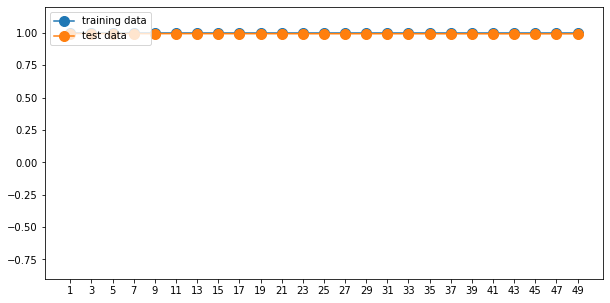

In [25]:
plt.figure(figsize=(10,5))
plt.plot(param_range, train_score, '-o' , label='training data', markersize=10)
plt.plot(param_range, test_score, '-o' , label='test data', markersize=10)
plt.ylim(-0.9001,1.2001)
plt.xticks(param_range)
plt.legend(loc=2)

In [26]:
i = 0
dict = {}
for neighbor, score in zip(param_range,zip(train_score,test_score)):
    dict[i] = {'n_neighbor': neighbor, 
            'train_score': score[0],
            'test_score':score[1]}
    i += 1

val_df = pd.DataFrame(dict).T
val_df

,n_neighbor,train_score,test_score
0,1.0,0.99996,0.994993
1,3.0,0.99996,0.994883
2,5.0,0.99996,0.994582
3,7.0,0.99996,0.994362
4,9.0,0.99996,0.994232
5,11.0,0.99996,0.994232
6,13.0,0.99996,0.994141
7,15.0,0.99996,0.993931
8,17.0,0.99996,0.993801
9,19.0,0.99996,0.993891


In [27]:
print('Max. Test Score: ',val_df['test_score'].max())
print('Max. Test Score index: ',val_df['test_score'].idxmax())

Max. Test Score:  0.9949926888751628
Max. Test Score index:  0
